# Fundamentals Of Data Analytics Assigment 

## Name Sinead Frawley
## Student ID G00376349

In [1]:
# Import liberies used for the project 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

### Loading the dataset


In [2]:
sns.set(color_codes=True)    
tips = sns.load_dataset("tips")


## <center>**Description**</center>

### <center>**Review of Previous Studies of the Dataset**</center>

Tips in restaurants may be influenced by many factors, including the type restaurant, size of the group, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers.[[1](https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset)] For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all cus- tomers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law,restaurant the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

In an academic paper by Hadley Wickham in this academic paper [[5](http://vita.had.co.nz/papers/tidy-data.html)]. The rules can be simply stated:

- Each variable is a column
- Each observation is a row

### <center>**Database Variables**</center>
 

 - **total_bill**
      - Description Total bill (cost of the meal), including tax, in US dollars 
       - type  Decimal 
 - **tip**
    - Decription Tip (gratuity) in US dollars
    - type Decimals 
 
 - **sex**
    - Decription Sex of person paying for the meal (0=male, 1=female) 
    - type String 
    
 - **smoker**
     - Decription Smoker in party? (0=No, 1=Yes)
     - type boolean
 - **day** 
    - Decriptipon 3=Thur, 4=Fri, 5=Sat, 6=Sun
    - tyoe  String 

- **time** 
   - Decription 0=Day, 1=Night 
   - type String  

- **size**
    - Decription Size of the party
    - type Integer
   





For example, the first five rows of the “tips” dataset look like this

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can see that sex, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data.
We will retrieve some common information such as min, max, unique and count for given numerical data.[[2](https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e)]


### <center>**Create new parameter tip_proportion_of_total_bill**</center>

In [4]:
tips['tip_proportion_of_total_bill'] = tips['tip']/tips['total_bill']

This field was created so is know what percenrtage of the total cost is the tip 

### <center>**Get  max, min, average, median for the numeric values for the entire dataset**</center>

The describe method gets information such as min, max and count for given numerical data for the entire dataset

In [5]:
tips.describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


### <center>**Plot of total bill verus tip for the entire dataset**</center>

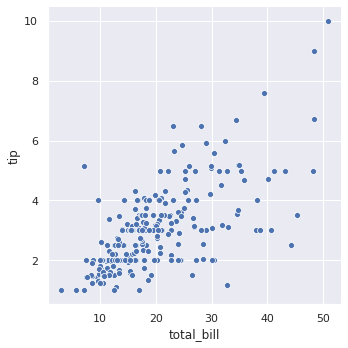

In [6]:
sns.relplot(x="total_bill", y="tip", data=tips);

From the plot above this is somewhat linear relationship between tips and total bill. But with a good few dots not fitting into the realtionship.

### <center>**Day of the Week**</center>

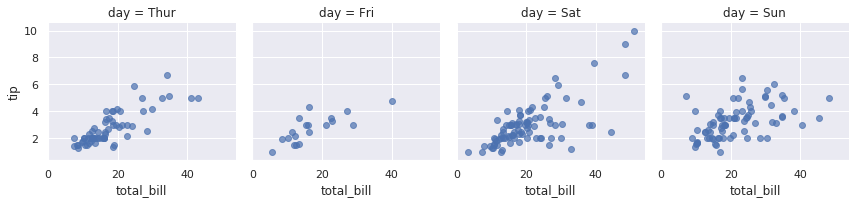

In [94]:
g = sns.FacetGrid(tips, col="day")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

#### **Count of lunches and dinners for all customers Thursday to Sunday**

In [7]:
pd.crosstab(index=tips['day'], columns=tips['time'], margins=True)

time,Lunch,Dinner,All
day,,,
Thur,61,1,62
Fri,7,12,19
Sat,0,87,87
Sun,0,76,76
All,68,176,244


#### **Count  of male and female  by each day  and time of the day served**

Got the idea on the following analysis from [[6](https://dfrieds.com/data-analysis/crosstabs-python-pandas)]

In [8]:
red = sns.light_palette("red", as_cmap=True)
pd.crosstab(index=[tips['day'], tips['sex']], columns=[tips['time'], tips['size']], ).style.background_gradient(cmap=red)

### <center>**Smoker versus Non Smoker**</center>


 
I used box plots for this because they carry lots of data in the graph.This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.[[7](https://seaborn.pydata.org/tutorial/categorical.html#distributions-of-observations-within-categories)]

I didnt account for time on box plots as the restarant  busist time  is Lunch by far on Thursday and Fridays and only open for dinners on Saturday and Sundays 

#### **Box  plot of total bills and tips  for each payment for each day for separate plot for non smoker**

##### Total Bill box plot

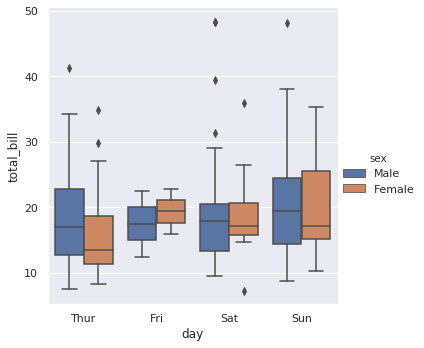

In [9]:
sns.catplot(x="day", y="total_bill", hue="sex",kind="box", data=(tips.loc[tips.loc[:,'smoker']== 'No']))


##### Tips box plot

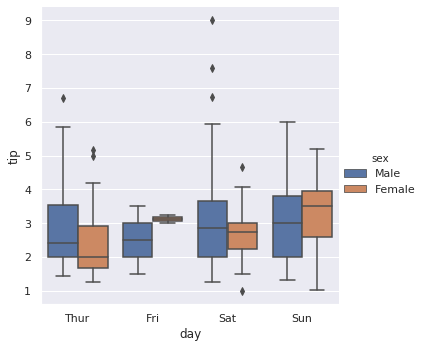

In [10]:
sns.catplot(x="day", y="tip", hue="sex",kind="box", data=(tips.loc[tips.loc[:,'smoker']== 'No']))

#### **Box  plot of total bills and tip for each payment for each day for separate plot for  smoker**

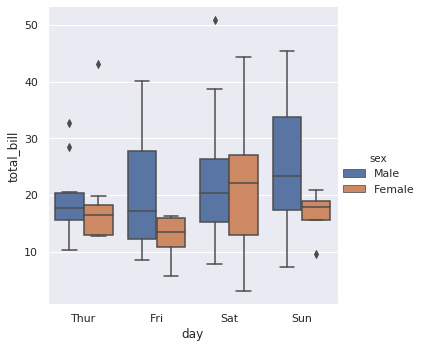

In [11]:
sns.catplot(x="day", y="total_bill", hue="sex",kind="box", data=(tips.loc[tips.loc[:,'smoker']== 'Yes']));

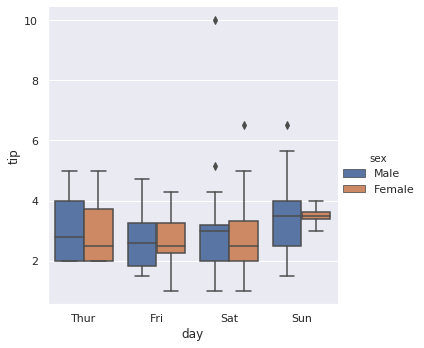

In [12]:
sns.catplot(x="day", y="tip", hue="sex",kind="box", data=(tips.loc[tips.loc[:,'smoker']== 'Yes']))

#### <center>**Scatter plots of tips versus total bill for both smokers and non smokers**</center>

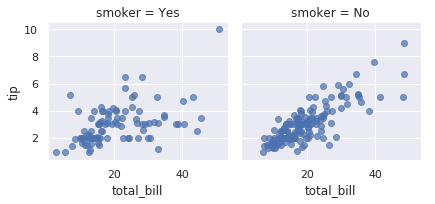

In [89]:
g = sns.FacetGrid(tips, col="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

### <center>**Males versus Female**</center>

#### <center>**Male**</center>

The describe method where sex = 'Male'

In [13]:
(tips.loc[tips.loc[:,'sex']== 'Male']).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,157.000000,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573,0.157651
std,9.246469,1.489102,0.955997,0.064778
min,7.250000,1.000000,1.000000,0.035638
25%,14.000000,2.000000,2.000000,0.121389
50%,18.350000,3.000000,2.000000,0.153492
75%,24.710000,3.760000,3.000000,0.186240
max,50.810000,10.000000,6.000000,0.710345


#### <center>**Female**</center>

The describe method where sex = 'Female'

In [90]:
(tips.loc[tips.loc[:,'sex']== 'Female']).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,87.000000,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770,0.166491
std,8.009209,1.159495,0.937644,0.053632
min,3.070000,1.000000,1.000000,0.056433
25%,12.750000,2.000000,2.000000,0.140416
50%,16.400000,2.750000,2.000000,0.155581
75%,21.520000,3.500000,3.000000,0.194266
max,44.300000,6.500000,6.000000,0.416667


### <center>**Scatter graph for both males and females**</center>

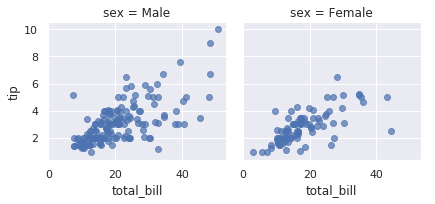

In [91]:
g = sns.FacetGrid(tips, col="sex")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

From the graph above for males the bigger the bill the bigger the tip. But for females this is the case until a limit between $4 and $6 but none other than one female tipped over $6.

### <center>**Scatter graph for both males and females for each day of the week**</center>

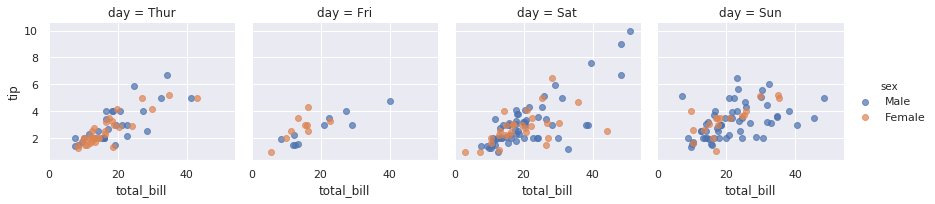

In [96]:
g = sns.FacetGrid(tips, col="day", hue="sex")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

This was especially for men on a saturday night 

There is strong  correlation between total bill and tip were sex = 'Male'  which is .67 as below

In [14]:
(tips.loc[tips.loc[:,'sex']== 'Male'])[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.669753
tip,0.669753,1.000000


The describe method where sex = 'Male' and time = 'Lunch'

In [15]:
(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,33.000000,33.000000,33.000000,33.000000
mean,18.048485,2.882121,2.363636,0.166083
std,7.953435,1.329017,0.994302,0.045727
min,7.510000,1.440000,1.000000,0.078616
25%,13.030000,2.000000,2.000000,0.130491
50%,16.580000,2.310000,2.000000,0.156738
75%,21.160000,4.000000,2.000000,0.195335
max,41.190000,6.700000,6.000000,0.266312


Correlation between total bill and lunch where sex = 'Male ' and time = 'Lunch'

In [16]:
(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')])[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.771515
tip,0.771515,1.000000


The describe method where sex = 'Male' and time = 'Dinner'

In [17]:
(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Dinner')]).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,124.000000,124.000000,124.000000,124.000000
mean,21.461452,3.144839,2.701613,0.155407
std,9.460974,1.529116,0.936868,0.068948
min,7.250000,1.000000,2.000000,0.035638
25%,14.705000,2.000000,2.000000,0.117330
50%,19.630000,3.000000,2.000000,0.150959
75%,25.642500,3.722500,3.000000,0.184454
max,50.810000,10.000000,6.000000,0.710345


Correlation between total bill and lunch where sex = 'Male ' and time = Dinner

In [18]:
(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Dinner')])[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.00000,0.64867
tip,0.64867,1.00000


Decribe method where sex  is Male and time is  Dinner and day is  Sunday

In [19]:
(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'day']== 'Sun') & (tips.loc[:,'time'] == 'Dinner') ]).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,58.000000,58.000000,58.000000,58.000000
mean,21.887241,3.220345,2.810345,0.162344
std,9.129142,1.271172,1.033762,0.088529
min,7.250000,1.320000,2.000000,0.065660
25%,15.135000,2.000000,2.000000,0.106829
50%,20.725000,3.085000,2.000000,0.157845
75%,26.550000,3.980000,4.000000,0.183570
max,48.170000,6.500000,6.000000,0.710345


Decribe method where sex  is Male and time is  Dinner and day is  Saturday

In [20]:
(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'day']== 'Sat') & (tips.loc[:,'time'] == 'Dinner') ]).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,59.000000,59.000000,59.000000,59.000000
mean,20.802542,3.083898,2.644068,0.151577
std,9.836306,1.791360,0.846142,0.046944
min,7.740000,1.000000,2.000000,0.035638
25%,13.905000,2.000000,2.000000,0.123863
50%,18.240000,3.000000,2.000000,0.151832
75%,24.165000,3.400000,3.000000,0.188712
max,50.810000,10.000000,5.000000,0.291990


In [21]:
(tips.loc[(tips.loc[:,'sex']== 'Male') & (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'day']== 'Sun') & (tips.loc[:,'time'] == 'Dinner') ])[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.706359
tip,0.706359,1.000000


In [22]:
(tips.loc[(tips.loc[:,'sex']== 'Male') & (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'day']== 'Sat') & (tips.loc[:,'time'] == 'Dinner') ]).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,32.000000,32.000000,32.000000,32.000000
mean,19.929063,3.256563,2.656250,0.162132
std,9.779061,1.839749,0.787375,0.040635
min,9.550000,1.250000,2.000000,0.098204
25%,13.347500,2.000000,2.000000,0.136428
50%,17.870000,2.860000,2.000000,0.154352
75%,20.500000,3.640000,3.000000,0.187737
max,48.330000,9.000000,4.000000,0.291990


In [23]:
(tips.loc[(tips.loc[:,'sex']== 'Male') & (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'day']== 'Sat') & (tips.loc[:,'time'] == 'Dinner') ])[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.919532
tip,0.919532,1.000000


In [24]:
(tips.loc[(tips.loc[:,'sex']== 'Male') & (tips.loc[:,'smoker']== 'Yes') & (tips.loc[:,'day']== 'Sat') & (tips.loc[:,'time'] == 'Dinner') ]).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,27.000000,27.000000,27.00000,27.000000
mean,21.837778,2.879259,2.62963,0.139067
std,9.988045,1.744338,0.92604,0.051455
min,7.740000,1.000000,2.00000,0.035638
25%,15.185000,1.990000,2.00000,0.085932
50%,20.290000,3.000000,2.00000,0.144823
75%,26.240000,3.185000,3.00000,0.188626
max,50.810000,10.000000,5.00000,0.205577


In [25]:
(tips.loc[(tips.loc[:,'sex']== 'Male') & (tips.loc[:,'smoker']== 'Yes') & (tips.loc[:,'day']== 'Sat') & (tips.loc[:,'time'] == 'Dinner') ])[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.621418
tip,0.621418,1.000000


In [26]:
(tips.loc[(tips.loc[:,'day']== 'Sun') & (tips.loc[:,'time'] == 'Lunch') ]).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


From the descrition statistics above shows that restarant is only open for dinners on sunday

In [27]:
(tips.loc[tips.loc[:,'sex']== 'Female']).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,87.000000,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770,0.166491
std,8.009209,1.159495,0.937644,0.053632
min,3.070000,1.000000,1.000000,0.056433
25%,12.750000,2.000000,2.000000,0.140416
50%,16.400000,2.750000,2.000000,0.155581
75%,21.520000,3.500000,3.000000,0.194266
max,44.300000,6.500000,6.000000,0.416667


In [28]:
(tips.loc[tips.loc[:,'sex']== 'Female'])[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.682999
tip,0.682999,1.000000


In [29]:
(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,35.000000,35.000000,35.000000,35.000000
mean,16.339143,2.582857,2.457143,0.162285
std,7.500803,1.075108,1.093910,0.034870
min,8.350000,1.250000,1.000000,0.072961
25%,12.065000,1.915000,2.000000,0.140416
50%,13.420000,2.010000,2.000000,0.153846
75%,17.865000,3.115000,2.000000,0.186289
max,43.110000,5.170000,6.000000,0.259314


In [30]:
(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')])[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.846495
tip,0.846495,1.000000


In [31]:
(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')]).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,52.000000,52.000000,52.000000,52.000000
mean,19.213077,3.002115,2.461538,0.169322
std,8.202085,1.193483,0.827506,0.063399
min,3.070000,1.000000,1.000000,0.056433
25%,14.080000,2.230000,2.000000,0.140539
50%,17.190000,3.000000,2.000000,0.160705
75%,24.692500,3.527500,3.000000,0.195036
max,44.300000,6.500000,5.000000,0.416667


In [32]:
(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')])[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.577231
tip,0.577231,1.000000


In [33]:
(tips.loc[(tips.loc[:,'sex']== 'Female') & (tips.loc[:,'day']== 'Sun') & (tips.loc[:,'time'] == 'Dinner') ]).describe()

,total_bill,tip,size,tip_proportion_of_total_bill
count,18.000000,18.000000,18.000000,18.000000
mean,19.872222,3.367222,2.944444,0.181569
std,7.837513,1.136775,0.937595,0.071430
min,9.600000,1.010000,2.000000,0.059447
25%,15.175000,2.707500,2.000000,0.149537
50%,17.410000,3.500000,3.000000,0.169397
75%,24.897500,3.937500,3.750000,0.200377
max,35.260000,5.200000,5.000000,0.416667


In [34]:
(tips.loc[(tips.loc[:,'sex']== 'Female') & (tips.loc[:,'day']== 'Sun') & (tips.loc[:,'time'] == 'Dinner') ])[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.743094
tip,0.743094,1.000000


From the graph above for males the bigger the bill the bigger the tip.  But for females this is the case until a limit between \\$4 and \\$6 but none other than one female tipped over \\$6. 

From graph above higher the bill ,the bigger the tip in most case , on satuday night most bills over \\$45 gave a tip \\$6 or more. And majority the tips on all nights of the week were between \\$2 and \\$4 

### Catergorial Variables

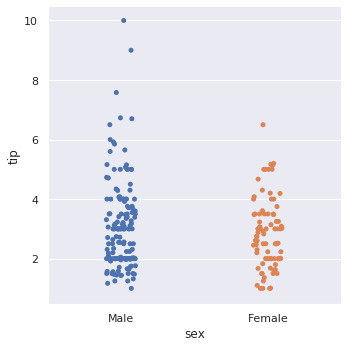

In [43]:
sns.catplot(x ="sex",y="tip",data=tips)

You can see see most tips are between 2 and 4 are both genders. And the odd male tips between 4 and 10.

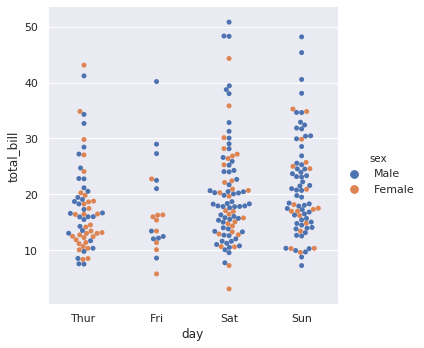

In [44]:
sns.catplot(x="day",y="total_bill",hue="sex",kind="swarm",data=tips)

You can see from the graph above most peoples total bill is between 10 and 30 .Saturday night was the busyest . Friday was the quiestest night. Saturday and Sunday had more men than women , while Thurday and Friday were 50/50

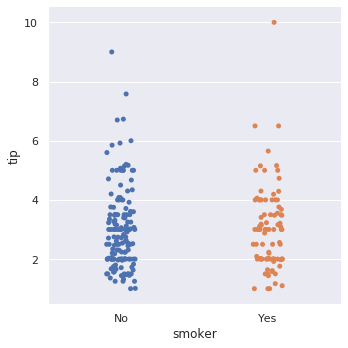

In [45]:
sns.catplot(x = "smoker",y="tip",order=["No","Yes"],data=tips)

You can see from the graph above there is no great difference in smoker and non smoker in tips 

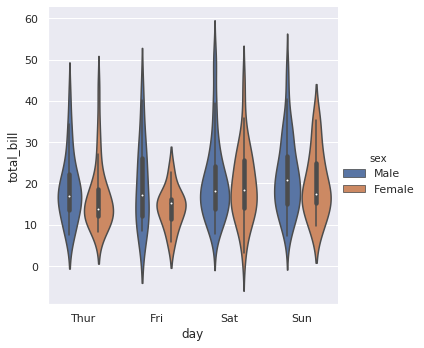

In [46]:
sns.catplot(x="day",y="total_bill",kind="violin",hue = "sex",data=tips)

 In this graph, we can see that the average amount of total_bill for females is always less than the males.[[2](https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e)] so total bill is dependant on sex. This also shows that odd male total is between 30 and 60

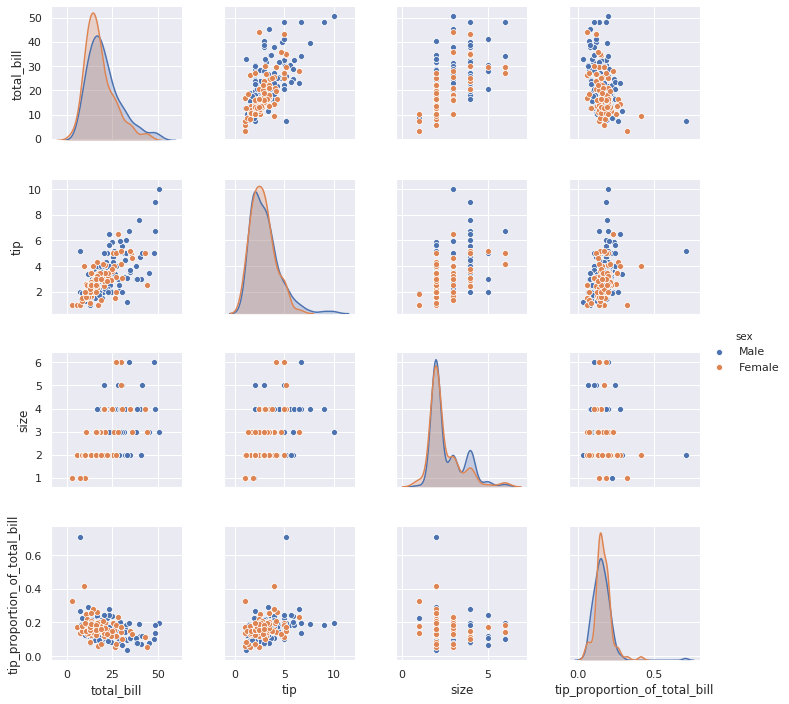

In [47]:
sns.pairplot(tips ,hue ='sex')

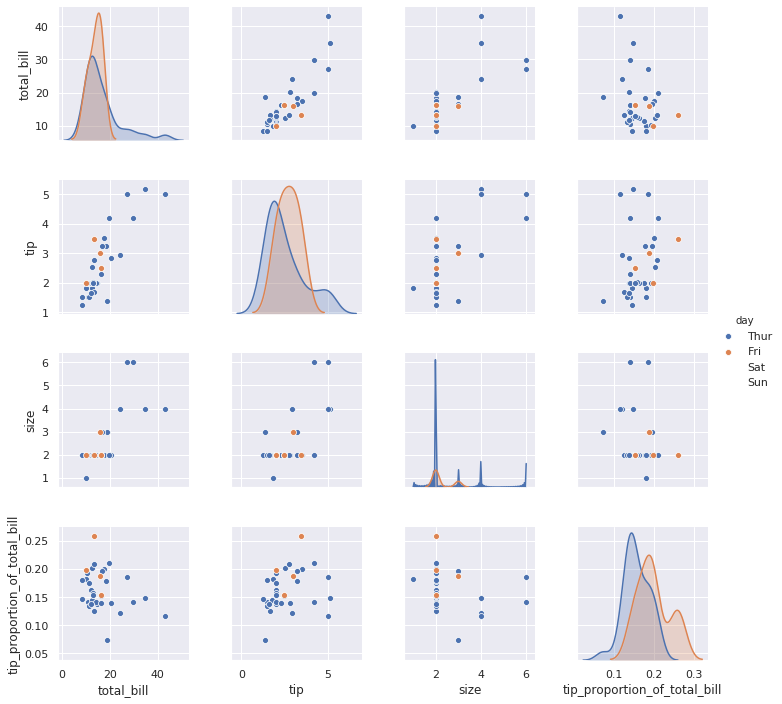

In [48]:
sns.pairplot((tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

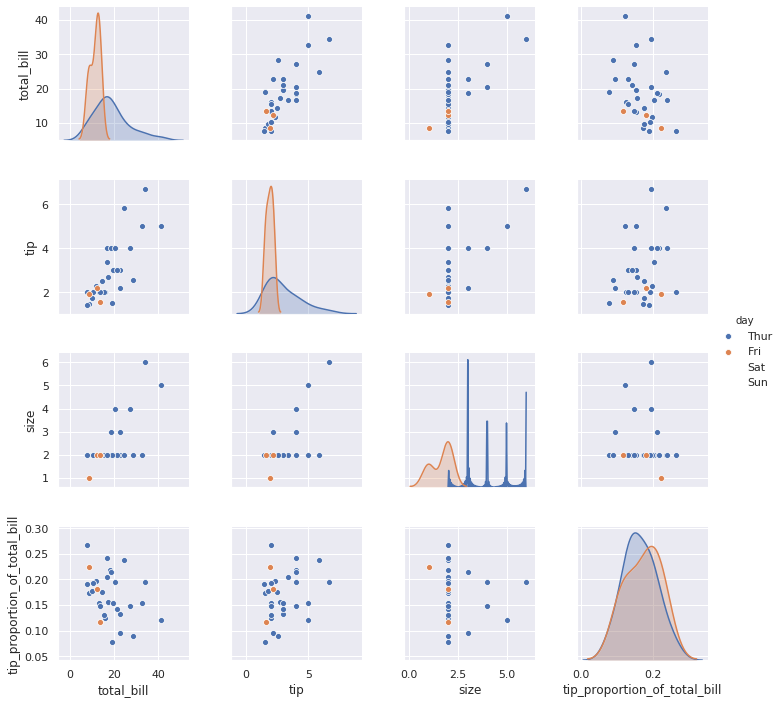

In [49]:
sns.pairplot((tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

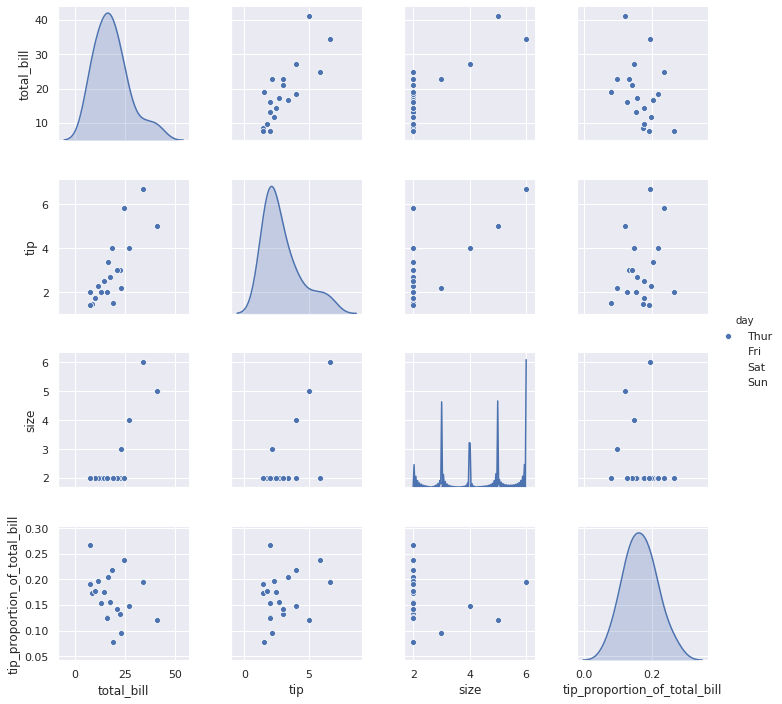

In [50]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

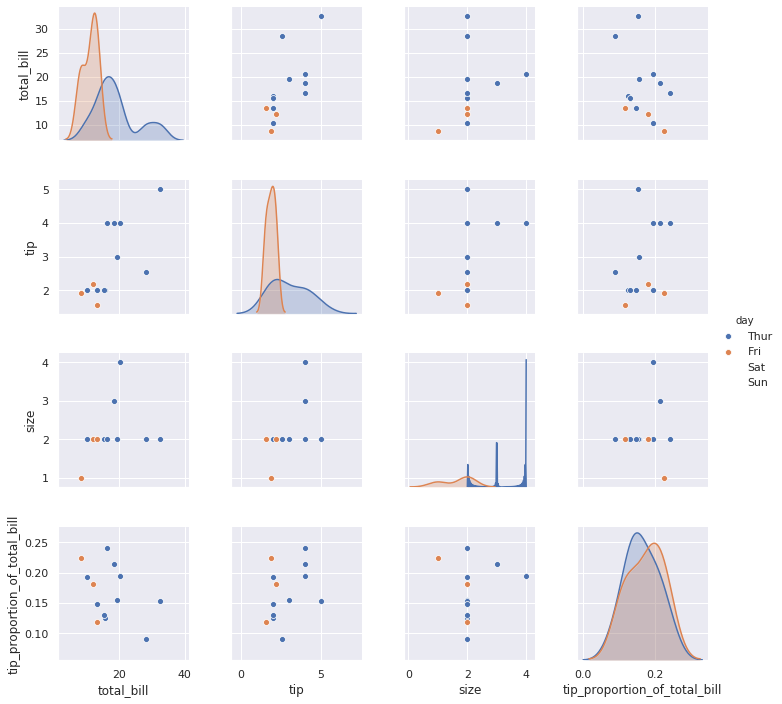

In [51]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'Yes') & (tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

/home/sinead/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/sinead/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


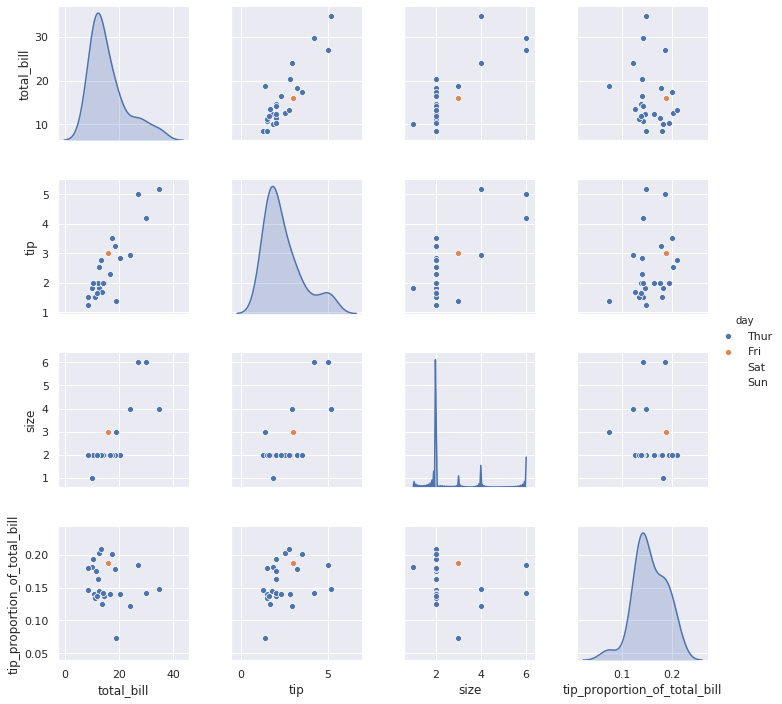

In [52]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

/home/sinead/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/sinead/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


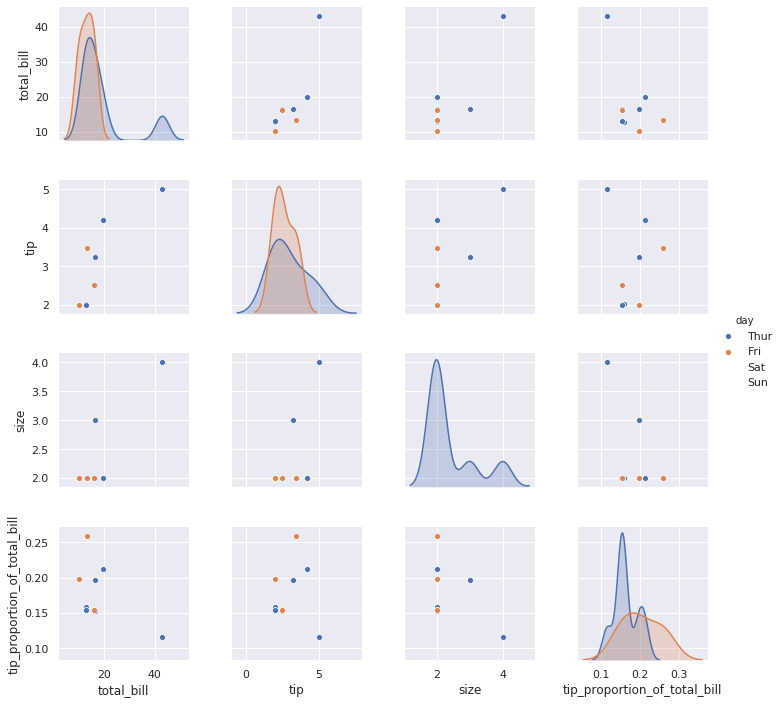

In [53]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'Yes') & (tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]) ,hue ='day')

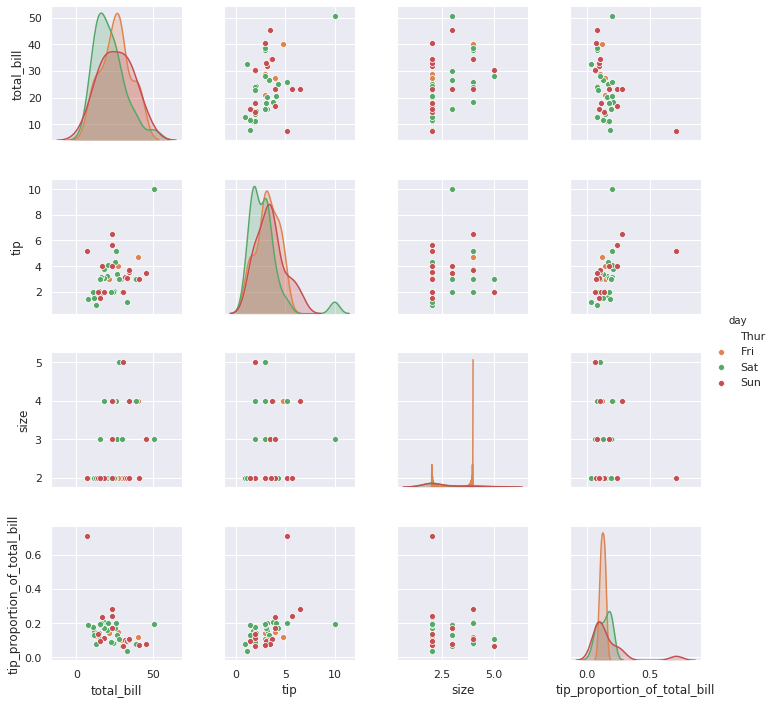

In [54]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'Yes') & (tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Dinner')]) ,hue ='day')

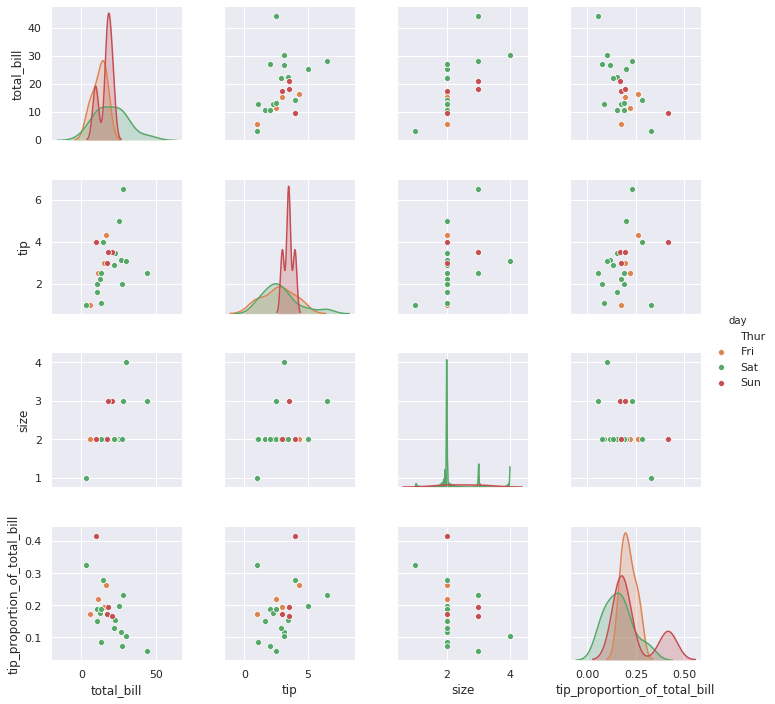

In [55]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'Yes') & (tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')]) ,hue ='day')

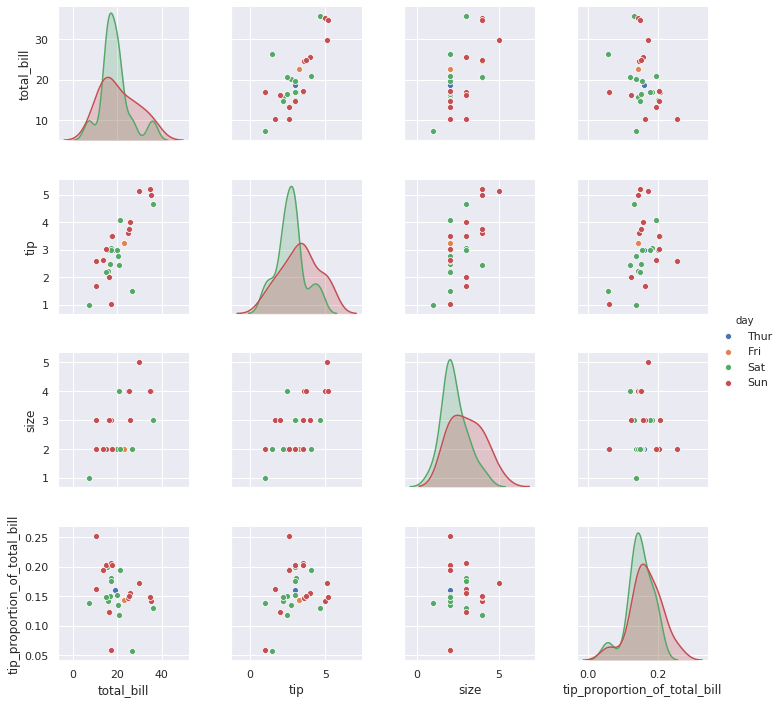

In [56]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')]) ,hue ='day')

In [92]:
(tips.loc[ (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')])

,total_bill,tip,sex,smoker,day,time,size,tip_proportion_of_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
11,35.26,5.00,Female,No,Sun,Dinner,4,0.141804
14,14.83,3.02,Female,No,Sun,Dinner,2,0.203641
16,10.33,1.67,Female,No,Sun,Dinner,3,0.161665
18,16.97,3.50,Female,No,Sun,Dinner,3,0.206246
21,20.29,2.75,Female,No,Sat,Dinner,2,0.135535
22,15.77,2.23,Female,No,Sat,Dinner,2,0.141408
29,19.65,3.00,Female,No,Sat,Dinner,2,0.152672
32,15.06,3.00,Female,No,Sat,Dinner,2,0.199203


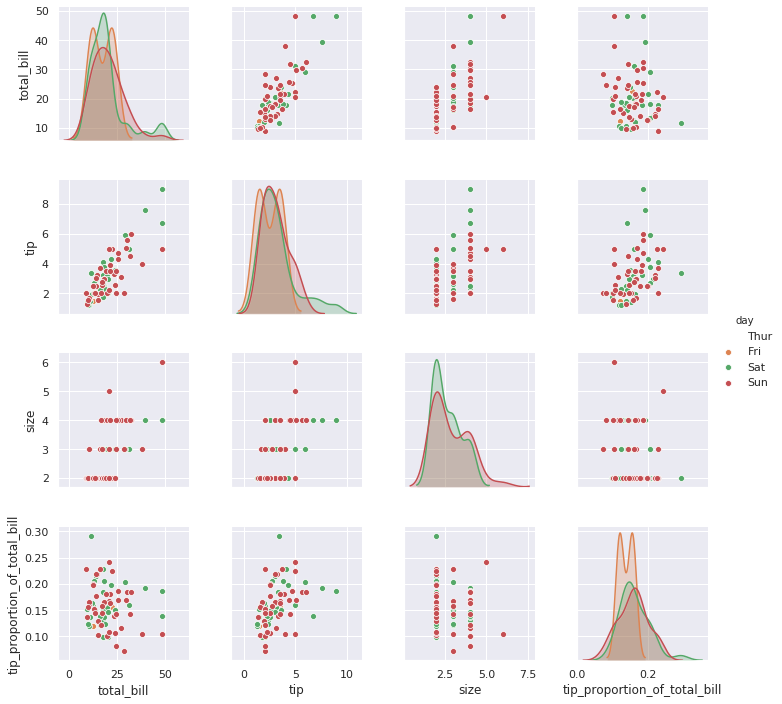

In [58]:
sns.pairplot((tips.loc[ (tips.loc[:,'smoker']== 'No') & (tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Dinner')]) ,hue ='day')

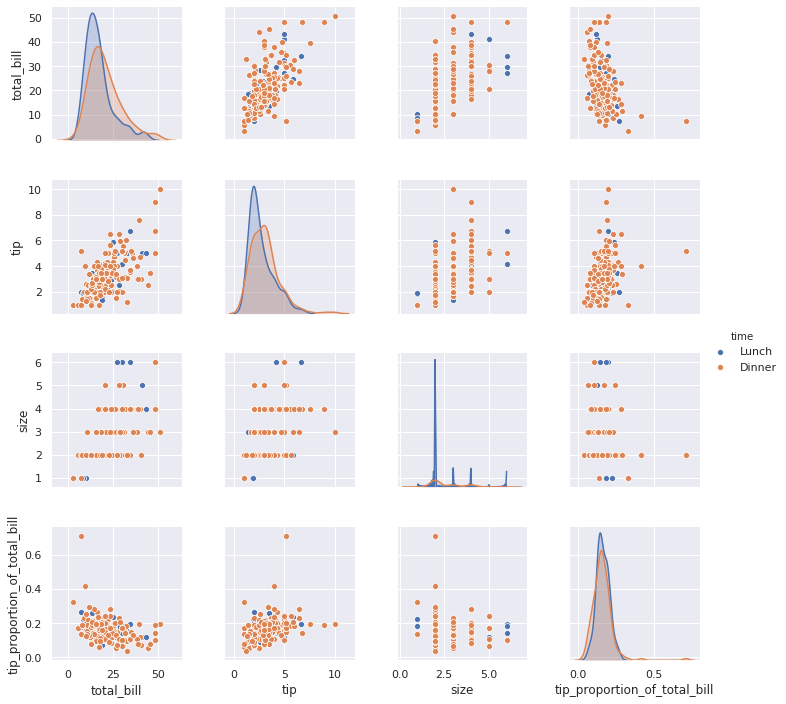

In [59]:
sns.pairplot(tips ,hue ='time')

## Regression

 For regression the function regplot is used [[3](https://seaborn.pydata.org/generated/seaborn.regplot.html)]

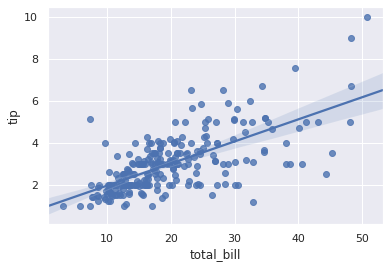

In [60]:
sns.set(color_codes=True)
ax = sns.regplot(x="total_bill", y="tip", data=tips)

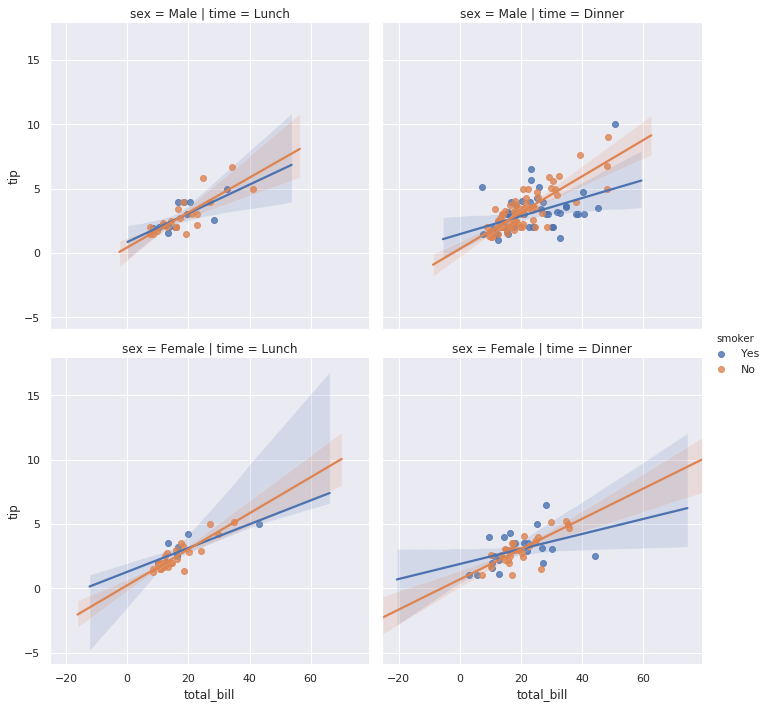

In [61]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

/home/sinead/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


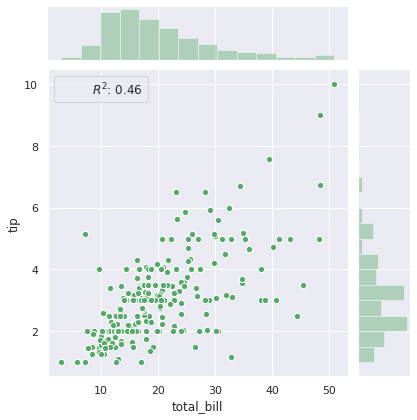

In [62]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

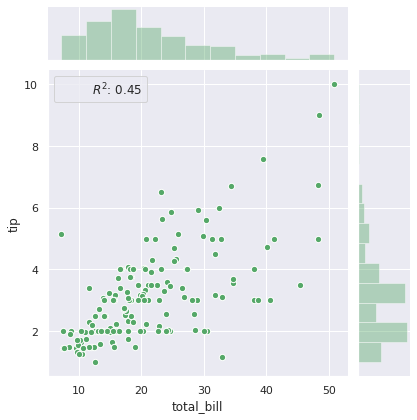

In [63]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[tips.loc[:,'sex']== 'Male']))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)


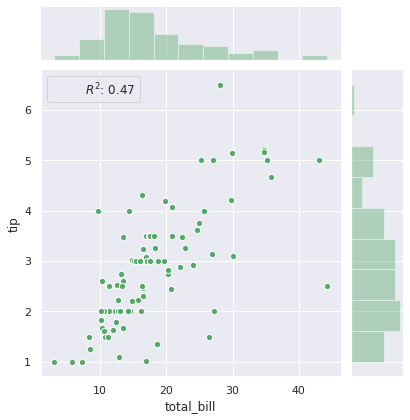

In [64]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[tips.loc[:,'sex']== 'Female']))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

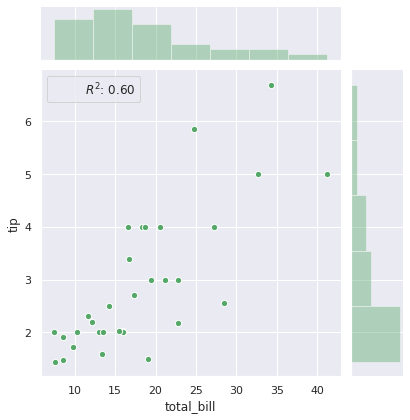

In [65]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

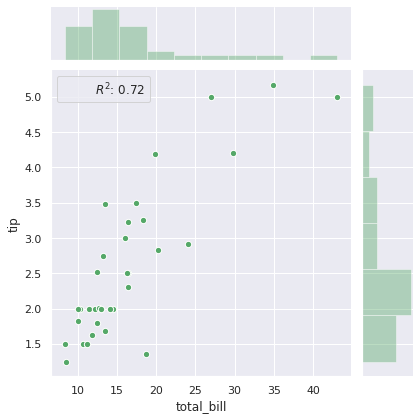

In [66]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

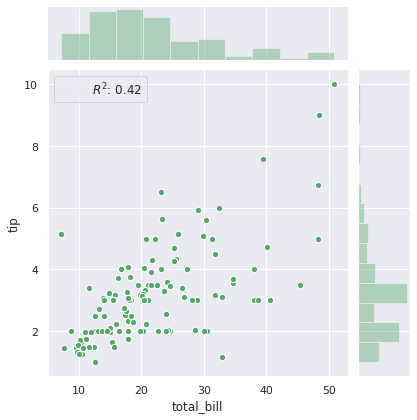

In [67]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Dinner')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

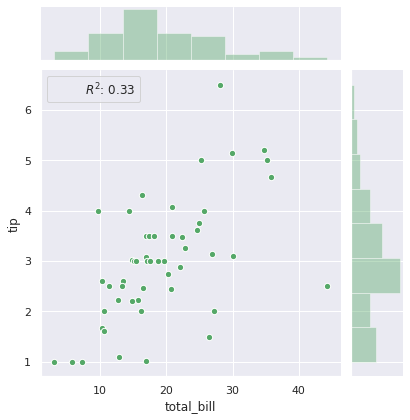

In [68]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

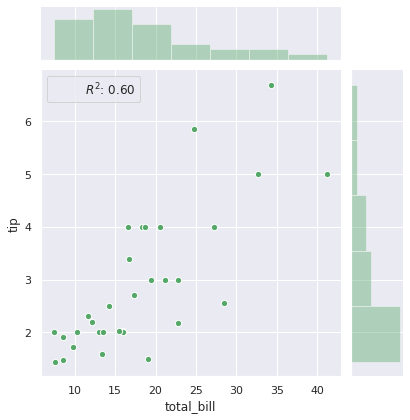

In [69]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

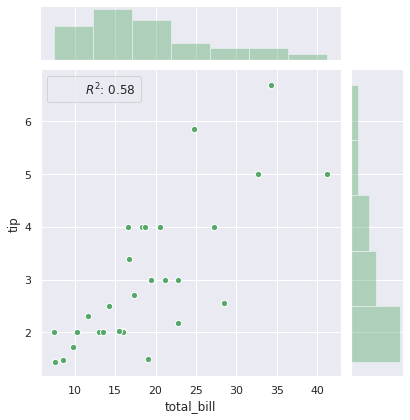

In [70]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch') & (tips.loc[:,'day']== 'Thur')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

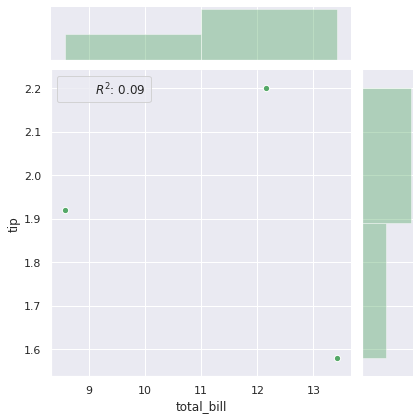

In [71]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch') & (tips.loc[:,'day']== 'Fri')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

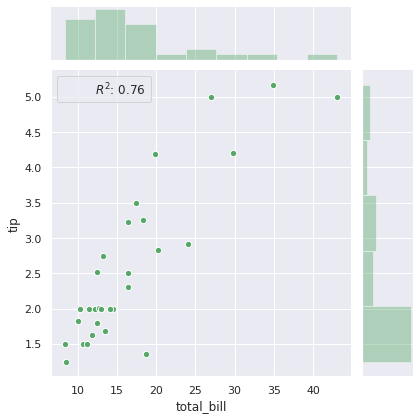

In [72]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch') & (tips.loc[:,'day']== 'Thur')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

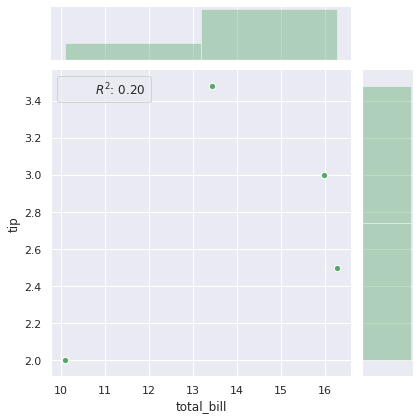

In [73]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch') & (tips.loc[:,'day']== 'Fri')]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

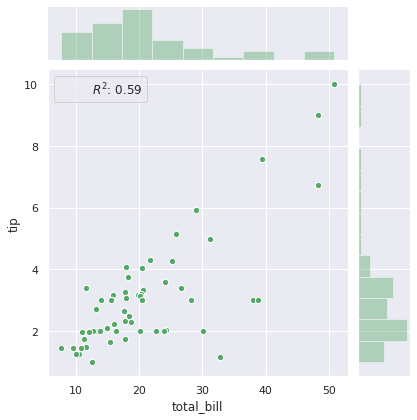

In [74]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male') & (tips.loc[:,'day']== 'Sat') & (tips.loc[:,'time'] == 'Dinner') ]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

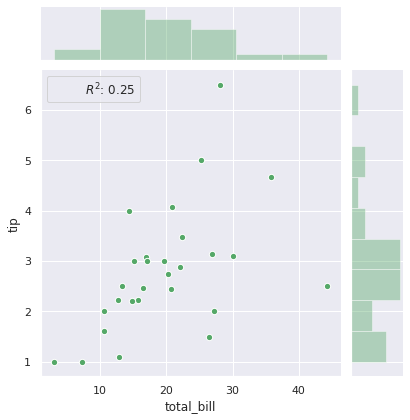

In [75]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female') & (tips.loc[:,'day']== 'Sat') & (tips.loc[:,'time'] == 'Dinner') ]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

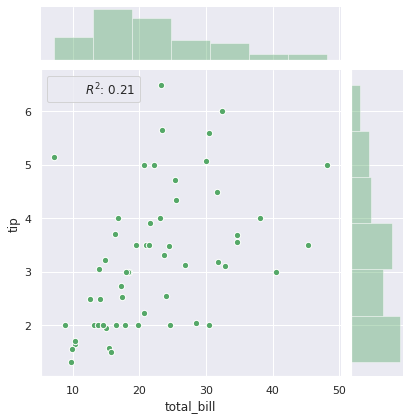

In [76]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Male') & (tips.loc[:,'day']== 'Sun') & (tips.loc[:,'time'] == 'Dinner') ]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

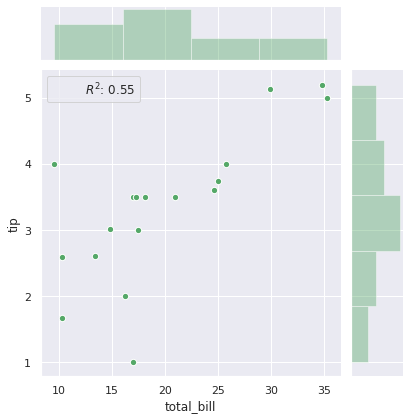

In [77]:
g = sns.JointGrid(x="total_bill", y="tip", data=(tips.loc[(tips.loc[:,'sex']== 'Female') & (tips.loc[:,'day']== 'Sun') & (tips.loc[:,'time'] == 'Dinner') ]))
g = g.plot_joint(plt.scatter,color="g", s=40, edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color="g")
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}: {val:.2f}",stat="$R^2$", loc="upper left", fontsize=12)

In [78]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

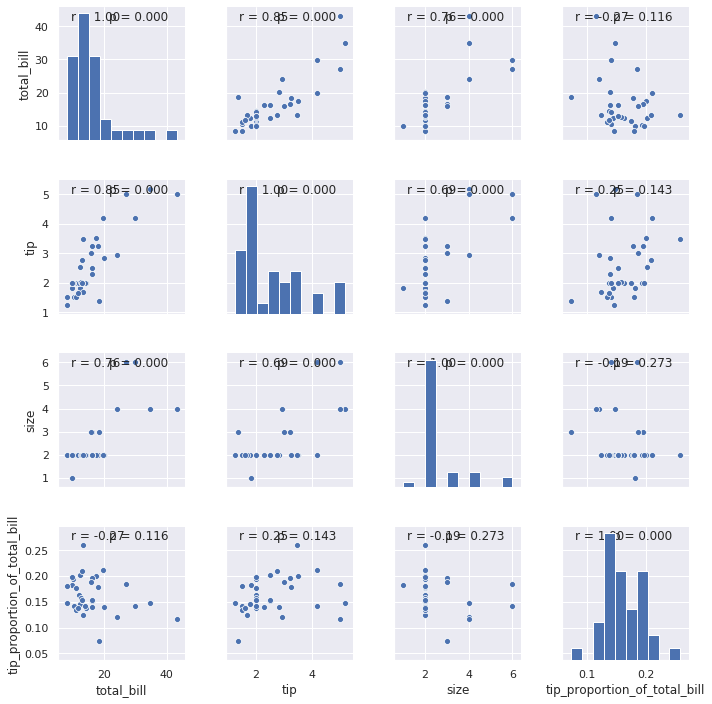

In [79]:
graph = sns.pairplot((tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]))
graph.map(corrfunc)


In [80]:
(tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')])

,total_bill,tip,sex,smoker,day,time,size,tip_proportion_of_total_bill
77,27.20,4.00,Male,No,Thur,Lunch,4,0.147059
78,22.76,3.00,Male,No,Thur,Lunch,2,0.131810
79,17.29,2.71,Male,No,Thur,Lunch,2,0.156738
80,19.44,3.00,Male,Yes,Thur,Lunch,2,0.154321
81,16.66,3.40,Male,No,Thur,Lunch,2,0.204082
83,32.68,5.00,Male,Yes,Thur,Lunch,2,0.152999
84,15.98,2.03,Male,No,Thur,Lunch,2,0.127034
86,13.03,2.00,Male,No,Thur,Lunch,2,0.153492
87,18.28,4.00,Male,No,Thur,Lunch,2,0.218818
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746


## Analysis

### **Referecnes**


1.  Ranjeet Jain seaborn_tips_dataset
https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

2. Sanket Doshi Analyze the data through data visualization using Seaborn https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

3.  Seaborn, Seaborn.regplot, https://seaborn.pydata.org/generated/seaborn.regplot.html

4. stackoverflow, Seaborn Pairplot Pearsons P statistic https://stackoverflow.com/questions/34255242/seaborn-pairplot-pearsons-p-statistic?lq=1

5. Hadley Wickham,The Journal of Statistical Software, vol. 59, 2014.,Tidy data,  http://vita.had.co.nz/papers/tidy-data.html

6. Dan Friedman, Data Analysis Data Wrangling Tutorial, crosstabs() Method: Compute Aggregated Metrics Across Categorical Columns,https://dfrieds.com/data-analysis/crosstabs-python-pandas

7. Seaborn , Plotting with categorical data,Boxplots https://seaborn.pydata.org/tutorial/categorical.html#distributions-of-observations-within-categories

8. Seaborn, Visualizing the distribution of a dataset,Kernel density estimation, https://seaborn.pydata.org/tutorial/distributions.html

9. Dan Friedman ,Data Analysis Data Wrangling Tutorial,Create New Columns Based on Operations  https://dfrieds.com/data-analysis/create-new-column-python-pandas

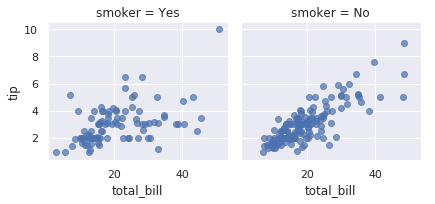

In [86]:
g = sns.FacetGrid(tips, col="smoker", )
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();